# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [16]:
# Choisir une année

YEAR = 1956

In [17]:
# Lister les fichiers de cette année

from os import listdir
from os.path import isfile, join

data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(YEAR) in f]
txts

['Bxl_1956_Tome_II1_Part_1.txt',
 'Bxl_1956_Tome_II1_Part_10.txt',
 'Bxl_1956_Tome_II1_Part_11.txt',
 'Bxl_1956_Tome_II1_Part_12.txt',
 'Bxl_1956_Tome_II1_Part_13.txt',
 'Bxl_1956_Tome_II1_Part_2.txt',
 'Bxl_1956_Tome_II1_Part_3.txt',
 'Bxl_1956_Tome_II1_Part_4.txt',
 'Bxl_1956_Tome_II1_Part_5.txt',
 'Bxl_1956_Tome_II1_Part_6.txt',
 'Bxl_1956_Tome_II1_Part_7.txt',
 'Bxl_1956_Tome_II1_Part_8.txt',
 'Bxl_1956_Tome_II1_Part_9.txt',
 'Bxl_1956_Tome_II2_Part_1.txt',
 'Bxl_1956_Tome_II2_Part_10.txt',
 'Bxl_1956_Tome_II2_Part_11.txt',
 'Bxl_1956_Tome_II2_Part_2.txt',
 'Bxl_1956_Tome_II2_Part_3.txt',
 'Bxl_1956_Tome_II2_Part_4.txt',
 'Bxl_1956_Tome_II2_Part_5.txt',
 'Bxl_1956_Tome_II2_Part_6.txt',
 'Bxl_1956_Tome_II2_Part_7.txt',
 'Bxl_1956_Tome_II2_Part_8.txt',
 'Bxl_1956_Tome_II2_Part_9.txt',
 'Bxl_1956_Tome_I_Part_1.txt',
 'Bxl_1956_Tome_I_Part_10.txt',
 'Bxl_1956_Tome_I_Part_11.txt',
 'Bxl_1956_Tome_I_Part_12.txt',
 'Bxl_1956_Tome_I_Part_13.txt',
 'Bxl_1956_Tome_I_Part_2.txt',
 'Bxl_1956_T

In [18]:
# Stocker le contenu de ces fichiers dans une liste

content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

In [19]:
# Vérifier le nombre de contenus collectés

len(content_list)

37

In [20]:
# Imprimer les 200 premiers caractères du contenu du premier fichier

content_list[0][:200]

'PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée\n\n1956\n\nBULLETIN\nCOMMUNAL\nTOME\n\nII\n\nImpr. H. & M . SCHAUMANS\nparvis Saint-Gilles, 41\nBruxelles\n1956\n\n\x0c\x0cN° 18\n\nCOMPTE RENDU DE LA SEANCE DU 2 JUILLET 1'

In [21]:
# Ecrire tout le contenu dans un fichier

with open(f'../data/{YEAR}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [24]:
# Imprimer le contenu du fichier et constater les "déchets"

with open(f'../data/{YEAR}.txt', 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée\n\n1956\n\nBULLETIN\nCOMMUNAL\nTOME\n\nII\n\nImpr. H. & M . SCHAUMANS\nparvis Saint-Gilles, 41\nBruxelles\n1956\n\n\x0c\x0cN° 18\n\nCOMPTE RENDU DE LA SEANCE DU 2 JUILLET 1956\n\nVILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication\n\nAnnée\nCONSEIL\nSéance\n\npériodique)\n\n1956\n\nCOMMUNAL\n\ndu 2 juillet\n\n1956.\n\nPRESIDENCE DE M . LUCIEN COOREMANS.\nBourgmestre.\n\nSOMMAIRE i\nPages\n1. Eloge funèbre de M. Robert Catteau, Conseiller communal et\npremier Echevin honoraire, décédé le 2'

In [25]:
# Appliquer la fonction filtering (que vous pouvez customiser)

from filtering import filtering

filtering(YEAR, folder='../data')

'Output has been written in ../data/1956_keywords.txt!'

In [26]:
# Vérifier le résultat

with open(f'../data/{YEAR}_keywords.txt', 'r') as f:
    after = f.read()

after[:500]

'publication periodique bruxelles annÃ©e bulletin communal tome impr schaumans parvis saint gilles bruxelles compte rendu seance juillet bruxelles bulletin communal publication annÃ©e conseil sÃ©ance pÃ©riodique communal juillet presidence lucien cooremans bourgmestre sommaire pages eloge funÃ¨bre robert catteau conseiller communal premier echevin honoraire dÃ©cÃ©dÃ© juin vÃ©rification pouvoirs jacques creyelman conseiller communal supplÃ©ant prestation serment installation creyelman qualitÃ© con'

## Créer le word cloud

In [20]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'../data/{YEAR}_keywords.txt',
    '--imagefile', f'../data/{YEAR}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '../data/1956_keywords.txt', '--imagefile', '../data/1956.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

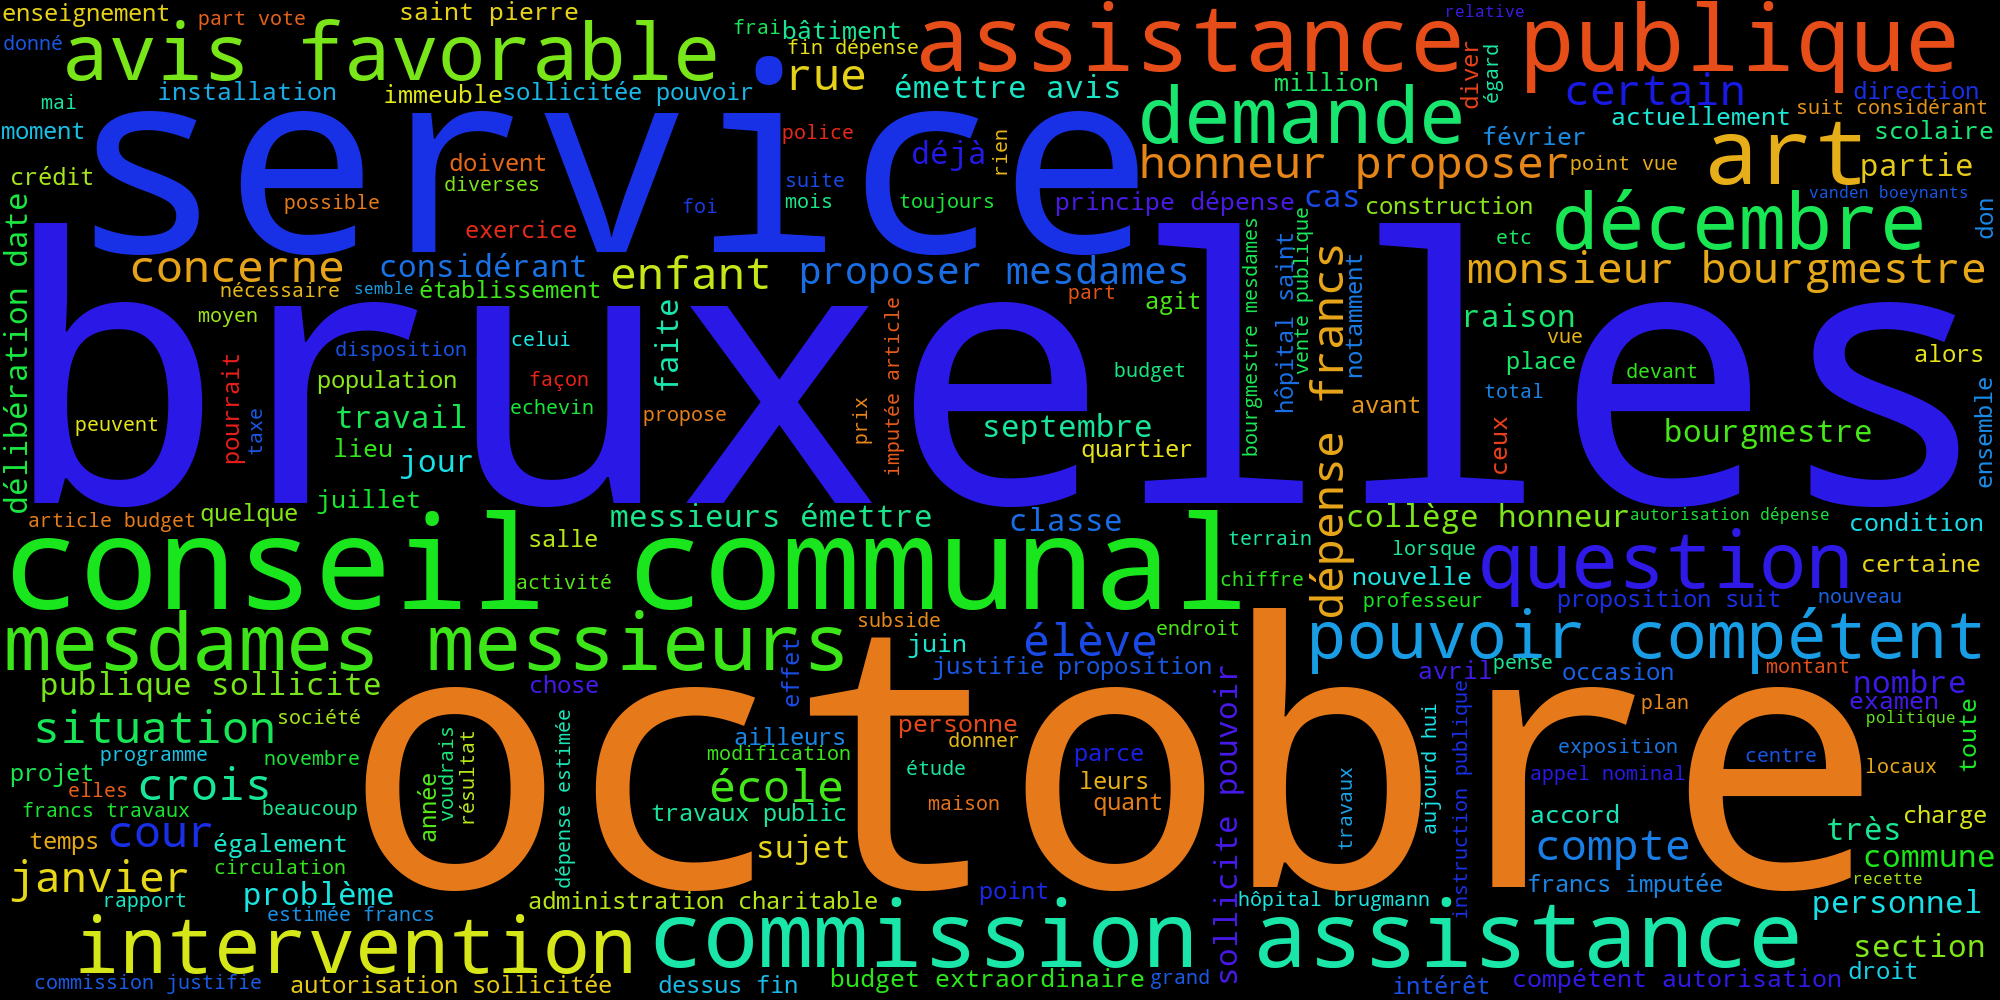

In [22]:
from IPython.display import Image

Image(filename=f'../data/{YEAR}.png')